This is code that goes along w/ the three 'orioles' you can see if you run this search on the O'Reilly site: https://www.safaribooksonline.com/search/?query=%22probabilistic%20programming%20from%20scratch%22.

In [8]:
import random 
import matplotlib.pyplot as plt
%matplotlib inline

# Part one

In [1]:
n_visitors_a = 100
n_conv_a = 4

n_visitors_b = 40
n_conv_b = 2

In [13]:
def estimate_conversion(n_visitors, n_conv, trial_conversion, n_estimates=5000):
    """Returns n_estimates estimates of the conversion fraction
    of a layout that received n_visitors, n_conv of which converted."""
    i = 0
    estimates = []
    while i < n_estimates:
        p = trial_conversion()
        n_sim = simulate_conversion(p, n_visitors)
        if n_conv == n_sim:
            estimates.append(p)
            i += 1
            
    return estimates

In [14]:
def trial_conversion_a():
    """A conversion percentage can be anywhere between 0.0 and 1.0."""
    return random.random()

In [15]:
def simulate_conversion(p, n_visitors):
    """Return the number of visitors who convert given the passed
    conversion fraction p."""
    outcomes = [random.random() < p for _ in range(n_visitors)]
    return sum(outcomes)

In [16]:
a_estimates = estimate_conversion(n_visitors_a,
                                  n_conv_a,
                                  trial_conversion_a)

In [17]:
len(a_estimates)

5000

(array([  0.08,   0.64,   2.92,   7.28,  11.24,  15.52,  17.56,  20.52,
         18.52,  21.44,  16.72,  14.52,  11.6 ,  10.6 ,   8.56,   6.64,
          4.4 ,   3.44,   2.24,   1.4 ,   0.96,   0.84,   0.48,   0.6 ,
          0.4 ,   0.28,   0.2 ,   0.24,   0.04,   0.04,   0.04,   0.04,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ]),
 array([ 0.   ,  0.005,  0.01 ,  0.015,  0.02 ,  0.025,  0.03 ,  0.035,
         0.04 ,  0.045,  0.05 ,  0.055,  0.06 ,  0.065,  0.07 ,  0.075,
         0.08 ,  0.085,  0.09 ,  0.095,  0.1  ,  0.105,  0.11 ,  0.115,
         0.12 ,  0.125,  0.13 ,  0.135,  0.14 ,  0.145,  0.15 ,  0.155,
         0.16 ,  0.165,  0.17 ,  0.175,  0.18 ,  0.185,  0.19 ,  0.195,
         0.2  ,  0.205,  0.21 ,  0.215,  0.22 ,  0.225,  0.23 ,  0.235,
         0.24 ,  0.245]),
 <a list of 49 Patch objects>)

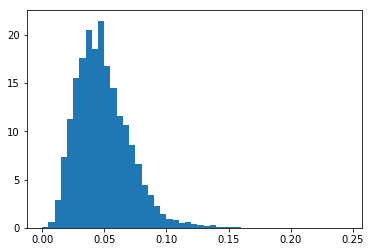

In [21]:
abbins = [i/200.0 for i in range(50)] # 50 bins between 0 and 0.25 (?)
plt.hist(a_estimates, bins=abbins, normed=True)

In [23]:
def trial_conversion_b():
    while True:
        x = random.normalvariate(mu=0.06, sigma=0.02)
        if 0 <= x <= 1:
            return x

In [24]:
trial_as = [trial_conversion_a() for _ in range(100000)]
trial_bs = [trial_conversion_b() for _ in range(100000)]

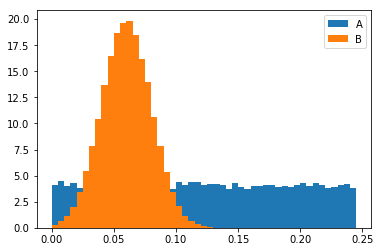

In [25]:
plt.hist(trial_as, bins=abbins, label='A', normed=True)
plt.hist(trial_bs, bins=abbins, label='B', normed=True)
plt.legend()

In [26]:
b_estimates = estimate_conversion(n_visitors_b,
                                  n_conv_b,
                                  trial_conversion_b)

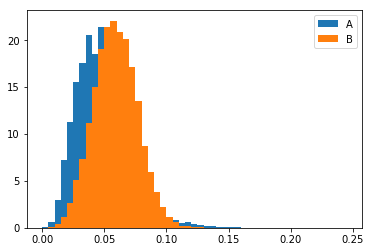

In [27]:
plt.hist(a_estimates, bins=abbins, label='A', normed=True)
plt.hist(b_estimates, bins=abbins, label='B', normed=True)
plt.legend()

In [28]:
b_better = [b > a for a, b in zip(a_estimates, b_estimates)]
sum(b_better) / len(a_estimates)

0.6656

# Part two